In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import mlrose_hiive as mlrose
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('heart_data/processed.cleveland.data')
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')
data = data.dropna()

predictors = data.drop("target",axis=1)
target = data["target"].replace([2,3,4], 1)
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [15]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Define neural network using random hill climb
nn_model1 = mlrose.NeuralNetwork()

In [17]:
nn_model1.fit(X_train_scaled, Y_train)

print('Training accuracy: ', nn_model1.score(X_train_scaled, Y_train))
print('Testing accuracy: ', nn_model1.score(X_test_scaled, Y_test))

Training accuracy:  0.6075949367088608
Testing accuracy:  0.6166666666666667


In [40]:

search_space = [
    {
        'algorithm': ['random_hill_climb', 'simulated_annealing', 'genetic_alg'],
        'learning_rate': [0.01, 0.1],
        'activation': ['identity', 'relu', 'sigmoid', 'tanh']
    }
]

clf = GridSearchCV(nn_model1, search_space, cv=5, verbose=0, n_jobs=-1)
best_model = clf.fit(X_train_scaled, Y_train)
print('complete')

complete


In [41]:
print('Best learning rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best restarts:', best_model.best_estimator_.get_params()['restarts'])
print('Best activation function:', best_model.best_estimator_.get_params()['activation'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Best learning rate: 0.1
Best restarts: 0
Best activation function: sigmoid
Best algorithm: genetic_alg


In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_model.best_estimator_, X_train_scaled, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



[learning_curve] Training set sizes: [  1   5   9  13  17  20  24  28  32  36  40  43  47  51  55  59  62  66
  70  74  78  82  85  89  93  97 101 104 108 112 116 120 124 127 131 135
 139 143 146 150 154 158 162 166 169 173 177 181 185 189]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  7.9min finished


In [43]:
test_scores2 = test_scores
test_scores2 = test_scores2[~np.isnan(test_scores2)]
print(test_scores2.max())

0.9166666666666666


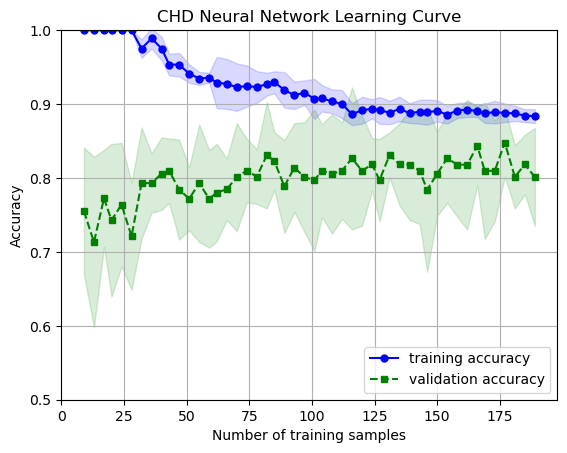

In [44]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('CHD Neural Network Learning Curve')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()